![](i-94-traffic.jpg)

# Encontrando Indicadores de Alto Tráfego na I-94

Nesse projeto, vamos analisar um dataset sobre o volume de tráfego sentido oeste na [interestadual I-94](https://en.wikipedia.org/wiki/Interstate_94).

O objetivo da nossa análise é explorar alguns indicadores relacionados ao alto volume de tráfego. Aqui alguns exemplos:
* Clima
* Hora do dia
* Dia da semana
* Entre outros

Algo que poderia acontecer é um aumento de tráfego nas férias de verão e também quando neva.

Caso queria baixar o dataset, é possível encontrá-lo aqui: https://archive.ics.uci.edu/ml/datasets/Metro+Interstate+Traffic+Volume

In [1]:
# Bibliotecas necessárias
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
interstate = pd.read_csv('Metro_Interstate_Traffic_Volume.csv')

In [3]:
interstate.head()

,holiday,temp,rain_1h,snow_1h,clouds_all,weather_main,weather_description,date_time,traffic_volume
0,None,288.28,0.0,0.0,40,Clouds,scattered clouds,2012-10-02 09:00:00,5545
1,None,289.36,0.0,0.0,75,Clouds,broken clouds,2012-10-02 10:00:00,4516
2,None,289.58,0.0,0.0,90,Clouds,overcast clouds,2012-10-02 11:00:00,4767
3,None,290.13,0.0,0.0,90,Clouds,overcast clouds,2012-10-02 12:00:00,5026
4,None,291.14,0.0,0.0,75,Clouds,broken clouds,2012-10-02 13:00:00,4918


In [4]:
interstate.tail()

,holiday,temp,rain_1h,snow_1h,clouds_all,weather_main,weather_description,date_time,traffic_volume
48199,None,283.45,0.0,0.0,75,Clouds,broken clouds,2018-09-30 19:00:00,3543
48200,None,282.76,0.0,0.0,90,Clouds,overcast clouds,2018-09-30 20:00:00,2781
48201,None,282.73,0.0,0.0,90,Thunderstorm,proximity thunderstorm,2018-09-30 21:00:00,2159
48202,None,282.09,0.0,0.0,90,Clouds,overcast clouds,2018-09-30 22:00:00,1450
48203,None,282.12,0.0,0.0,90,Clouds,overcast clouds,2018-09-30 23:00:00,954


In [5]:
interstate.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48204 entries, 0 to 48203
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   holiday              48204 non-null  object 
 1   temp                 48204 non-null  float64
 2   rain_1h              48204 non-null  float64
 3   snow_1h              48204 non-null  float64
 4   clouds_all           48204 non-null  int64  
 5   weather_main         48204 non-null  object 
 6   weather_description  48204 non-null  object 
 7   date_time            48204 non-null  object 
 8   traffic_volume       48204 non-null  int64  
dtypes: float64(3), int64(2), object(4)
memory usage: 3.3+ MB


O dataset possui 48.204 linhas e 9 colunas, tudo sem nenhum valor nulo. Cada linha descreve o volume de tráfego e a qualidade do tempo em determinada hora do dia. O início da coleta dos dados começou em 2012-10-02 (ano/mês/dia) e foi até 2018-09-30.

De acordo com a documentação do dataset, os dados contidos são sobre o tráfego no sentido oeste. Com isso, devemos evitar generalizar os resultados para toda a rodovia I-94.

![](i94_figma.png)

---

## Análise exploratória

### Volume de tráfego
Vamos iniciar a análise examinando a distribuição da coluna `traffic_volume`.

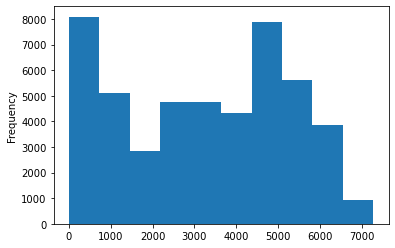

In [6]:
interstate['traffic_volume'].plot.hist()
plt.show()

In [7]:
interstate['traffic_volume'].describe()

count    48204.000000
mean      3259.818355
std       1986.860670
min          0.000000
25%       1193.000000
50%       3380.000000
75%       4933.000000
max       7280.000000
Name: traffic_volume, dtype: float64

Entre 9h de 02/10/2012 e 23h de 30/09/2018, o volume de tráfego variou de __0 a 7.280 carros__, com uma __média de 3.260 carros__.

Cerca de 25% do tempo, havia apenas 1.193 carros ou menos passando pela estação a cada hora - isso provavelmente ocorre durante a noite ou quando uma estrada está em construção. Porém, 75% das vezes, o volume de tráfego foi quatro vezes maior (4.933 carros ou mais).

Esses dados nos trazem algo para avaliar mais a fundo: __comparar dados diurnos com dados noturnos__.

### Dia vs Noite

Começaremos dividindo o dataset em duas partes:
* Dia: 7am até 7pm
* Noite: 7pm até 7am

In [8]:
# Transformando a coluna date_time para o tipo datetime
interstate['date_time'] = pd.to_datetime(interstate['date_time'])
interstate['date_time'].head(10)

0   2012-10-02 09:00:00
1   2012-10-02 10:00:00
2   2012-10-02 11:00:00
3   2012-10-02 12:00:00
4   2012-10-02 13:00:00
5   2012-10-02 14:00:00
6   2012-10-02 15:00:00
7   2012-10-02 16:00:00
8   2012-10-02 17:00:00
9   2012-10-02 18:00:00
Name: date_time, dtype: datetime64[ns]

In [9]:
# Isolando dia e noite
day = interstate.copy()[(interstate['date_time'].dt.hour >= 7) & (interstate['date_time'].dt.hour < 19)]
night = interstate.copy()[(interstate['date_time'].dt.hour >= 19) | (interstate['date_time'].dt.hour < 7)]

In [10]:
day

,holiday,temp,rain_1h,snow_1h,clouds_all,weather_main,weather_description,date_time,traffic_volume
0,None,288.28,0.00,0.0,40,Clouds,scattered clouds,2012-10-02 09:00:00,5545
1,None,289.36,0.00,0.0,75,Clouds,broken clouds,2012-10-02 10:00:00,4516
2,None,289.58,0.00,0.0,90,Clouds,overcast clouds,2012-10-02 11:00:00,4767
3,None,290.13,0.00,0.0,90,Clouds,overcast clouds,2012-10-02 12:00:00,5026
4,None,291.14,0.00,0.0,75,Clouds,broken clouds,2012-10-02 13:00:00,4918
...,...,...,...,...,...,...,...,...,...
48194,None,283.84,0.00,0.0,75,Rain,proximity shower rain,2018-09-30 15:00:00,4302
48195,None,283.84,0.00,0.0,75,Drizzle,light intensity drizzle,2018-09-30 15:00:00,4302
48196,None,284.38,0.00,0.0,75,Rain,light rain,2018-09-30 16:00:00,4283
48197,None,284.79,0.00,0.0,75,Clouds,broken clouds,2018-09-30 17:00:00,4132


In [11]:
night

,holiday,temp,rain_1h,snow_1h,clouds_all,weather_main,weather_description,date_time,traffic_volume
10,None,290.97,0.0,0.0,20,Clouds,few clouds,2012-10-02 19:00:00,3539
11,None,289.38,0.0,0.0,1,Clear,sky is clear,2012-10-02 20:00:00,2784
12,None,288.61,0.0,0.0,1,Clear,sky is clear,2012-10-02 21:00:00,2361
13,None,287.16,0.0,0.0,1,Clear,sky is clear,2012-10-02 22:00:00,1529
14,None,285.45,0.0,0.0,1,Clear,sky is clear,2012-10-02 23:00:00,963
...,...,...,...,...,...,...,...,...,...
48199,None,283.45,0.0,0.0,75,Clouds,broken clouds,2018-09-30 19:00:00,3543
48200,None,282.76,0.0,0.0,90,Clouds,overcast clouds,2018-09-30 20:00:00,2781
48201,None,282.73,0.0,0.0,90,Thunderstorm,proximity thunderstorm,2018-09-30 21:00:00,2159
48202,None,282.09,0.0,0.0,90,Clouds,overcast clouds,2018-09-30 22:00:00,1450


Agora que isolamos dia e noite, por meio dos histogramas iremos verificar o volume de tráfego lado a lado.

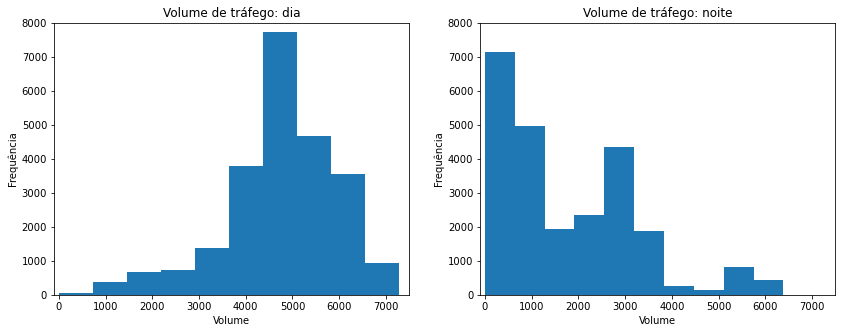

In [12]:
plt.figure(figsize=(14, 5))

plt.subplot(1, 2, 1)
plt.hist(day['traffic_volume'])
plt.xlim(-100, 7500)
plt.ylim(0, 8000)
plt.title('Volume de tráfego: dia')
plt.xlabel('Volume')
plt.ylabel('Frequência')

plt.subplot(1, 2, 2)
plt.hist(night['traffic_volume'])
plt.xlim(-100, 7500)
plt.ylim(0, 8000)
plt.title('Volume de tráfego: noite')
plt.xlabel('Volume')
plt.ylabel('Frequência')

plt.show()

In [13]:
day['traffic_volume'].describe()

count    23877.000000
mean      4762.047452
std       1174.546482
min          0.000000
25%       4252.000000
50%       4820.000000
75%       5559.000000
max       7280.000000
Name: traffic_volume, dtype: float64

In [14]:
night['traffic_volume'].describe()

count    24327.000000
mean      1785.377441
std       1441.951197
min          0.000000
25%        530.000000
50%       1287.000000
75%       2819.000000
max       6386.000000
Name: traffic_volume, dtype: float64

O histograma que mostra a distribuição do volume de tráfego durante o dia está inclinado pra esquerda. Isso significa que a maioria dos valores de volume de tráfego é alta — 4.252 ou mais carros passando a cada hora em 75% do tempo (25% dos valores são menores que 4.252).

Já os dados da noite está inclinado para a direita. O que mostra que o volume de tráfego é baixo - em 75% do tempo, é inferior a 2.819.

Por mais que ainda existam medições de mais de 5.000 carros por hora, o tráfego a noite é geralmente baixo. Levando em consideração que o objetivo é encontrar indicadores de tráfego intenso, irei trabalahr apenas nos __dados diurnos daqui para frente__.

### Indicadores de tempo

A ideia agora é analisar de forma granular em questões de tempo, pois o volume pode variar muito de acordo com o mês, dia ou hora.

Vamos verificar como o volume muda de acordo com:
* Mês
* Dia da semana
* Hora

#### Mês

In [15]:
# Criando uma nova coluna com somente o mês
day['month'] = day['date_time'].dt.month

In [16]:
day.head(5)

,holiday,temp,rain_1h,snow_1h,clouds_all,weather_main,weather_description,date_time,traffic_volume,month
0,None,288.28,0.0,0.0,40,Clouds,scattered clouds,2012-10-02 09:00:00,5545,10
1,None,289.36,0.0,0.0,75,Clouds,broken clouds,2012-10-02 10:00:00,4516,10
2,None,289.58,0.0,0.0,90,Clouds,overcast clouds,2012-10-02 11:00:00,4767,10
3,None,290.13,0.0,0.0,90,Clouds,overcast clouds,2012-10-02 12:00:00,5026,10
4,None,291.14,0.0,0.0,75,Clouds,broken clouds,2012-10-02 13:00:00,4918,10


In [17]:
# Dataset com a média por mês de todas as colunas
by_month = day.groupby('month').mean()

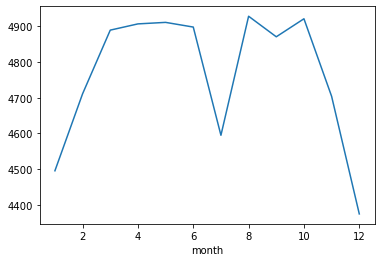

In [18]:
# Média de volume por mês
by_month['traffic_volume'].plot.line()
plt.show()

O tráfego parece mais baixo durante os meses frios (novembro a fevereiro) e mais intenso nos meses quentes (março a outubro), com uma exceção interessante: __julho__. Existe algo especial sobre julho? O tráfego é significativamente mais leve em julho de cada ano?

Vamos ver como o volume de tráfego mudou a cada ano em julho.

In [19]:
# Criando uma nova coluna com somente o ano
day['year'] = day['date_time'].dt.year

In [20]:
day.head(5)

,holiday,temp,rain_1h,snow_1h,clouds_all,weather_main,weather_description,date_time,traffic_volume,month,year
0,None,288.28,0.0,0.0,40,Clouds,scattered clouds,2012-10-02 09:00:00,5545,10,2012
1,None,289.36,0.0,0.0,75,Clouds,broken clouds,2012-10-02 10:00:00,4516,10,2012
2,None,289.58,0.0,0.0,90,Clouds,overcast clouds,2012-10-02 11:00:00,4767,10,2012
3,None,290.13,0.0,0.0,90,Clouds,overcast clouds,2012-10-02 12:00:00,5026,10,2012
4,None,291.14,0.0,0.0,75,Clouds,broken clouds,2012-10-02 13:00:00,4918,10,2012


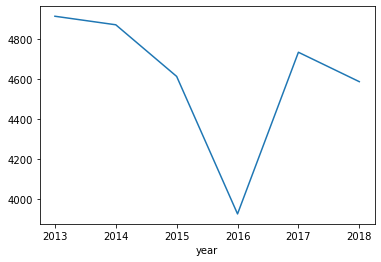

In [21]:
only_july = day[day['month'] == 7] # isolando todos os dados de julho
only_july.groupby('year').mean()['traffic_volume'].plot.line()
plt.show()

Normalmente, o tráfego é bastante intenso em julho, semelhante aos outros meses quentes. A única exceção que notamos é 2016, onde teve uma grande queda no volume de tráfego. Uma possível razão para isso é a construção ou reforma de estradas – esse [artigo de 2016](https://www.crainsdetroit.com/article/20160728/NEWS/160729841/weekend-construction-i-96-us-23-bridge-work-i-94-lane-closures-i-696) embasa essa hipótese.

Como conclusão provisória, podemos dizer que os meses quentes geralmente apresentam tráfego mais alto em comparação com os meses frios. Em um mês quente, pode-se esperar para cada hora do dia um volume de tráfego próximo a 5.000 carros.

#### Dia da semana

In [22]:
# Criando uma nova coluna com somente os dias da semana
day['dayofweek'] = day['date_time'].dt.dayofweek

In [23]:
day.head(5)

,holiday,temp,rain_1h,snow_1h,clouds_all,weather_main,weather_description,date_time,traffic_volume,month,year,dayofweek
0,None,288.28,0.0,0.0,40,Clouds,scattered clouds,2012-10-02 09:00:00,5545,10,2012,1
1,None,289.36,0.0,0.0,75,Clouds,broken clouds,2012-10-02 10:00:00,4516,10,2012,1
2,None,289.58,0.0,0.0,90,Clouds,overcast clouds,2012-10-02 11:00:00,4767,10,2012,1
3,None,290.13,0.0,0.0,90,Clouds,overcast clouds,2012-10-02 12:00:00,5026,10,2012,1
4,None,291.14,0.0,0.0,75,Clouds,broken clouds,2012-10-02 13:00:00,4918,10,2012,1


In [24]:
# Dataset com a média por dia da semana de todas as colunas
by_dayofweek = day.groupby('dayofweek').mean()

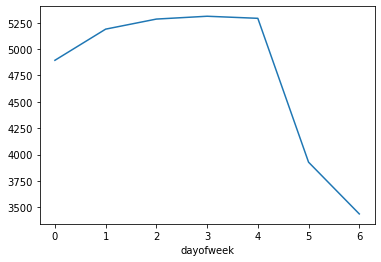

In [25]:
# Média de volume por dia da semana
by_dayofweek['traffic_volume'].plot.line()
plt.show()

O volume de tráfego é significativamente maior em dias úteis (segunda a sexta). Tirando segunda-feira, temos apenas valores acima de 5.000 durante os dias úteis. O trânsito é mais leve nos finais de semana, com valores abaixo de 4.000 carros.

#### Hora

Vamos agora verificar os valores com base na hora do dia. Como os finais de semana irão puxar os valores médios pra baixo, então vamos olhar apenas para as médias de forma separada.

In [26]:
day['hour'] = day['date_time'].dt.hour
bussiness_days = day.copy()[day['dayofweek'] <= 4] # 4 = sexta
weekend = day.copy()[day['dayofweek'] >= 5] # 5 = sábado
by_hour_business = bussiness_days.groupby('hour').mean()
by_hour_weekend = weekend.groupby('hour').mean()

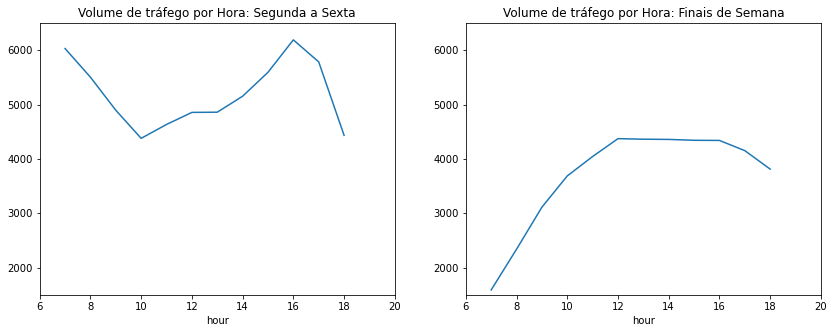

In [27]:
plt.figure(figsize=(14,5))

plt.subplot(1, 2, 1)
by_hour_business['traffic_volume'].plot.line()
plt.xlim(6,20)
plt.ylim(1500,6500)
plt.title('Volume de tráfego por Hora: Segunda a Sexta')

plt.subplot(1, 2, 2)
by_hour_weekend['traffic_volume'].plot.line()
plt.xlim(6,20)
plt.ylim(1500,6500)
plt.title('Volume de tráfego por Hora: Finais de Semana')

plt.show()

O  volume de tráfego geralmente é maior durante os dias úteis em comparação com os finais de semana. Como esperado, o horário de pico é entre 7 e 16 - que é quando a maioria das pessoas vai da casa para o trabalho e volta. Vemos volumes de mais de 6.000 carros no horário de pico.

#### Resumo dos indicadores de tempo

Encontramos alguns indicadores de tráfego intenso relacionados ao tempo:
* Alto volume durante os meses quentes (março a outubro) em comparação com os meses frios (novembro a fevereiro)
* Maior volume em dias úteis em comparação com finais de semana
* Nos dias úteis, o horário de pico é em torno de 7 e 16

### Indicadores meteorológicos

Agora vamos verificar outro possível indicador de volume de tráfego: condição do tempo. Para isso, temos algumas colunas que podem ser úteis - `temp`, `rain_1h`, `snow_1h`, `clouds_all`, `weather_main`, `weather_description`.

Algumas das colunas são do tipo numérico, por isso podemos ver a correlação delas com os valores da `traffic_volume`.

In [28]:
day.corr()['traffic_volume']

temp              0.128317
rain_1h           0.003697
snow_1h           0.001265
clouds_all       -0.032932
traffic_volume    1.000000
month            -0.022337
year             -0.003557
dayofweek        -0.416453
hour              0.172704
Name: traffic_volume, dtype: float64

A temperatura mostra uma correlação mais forte, com um valor de apenas +0,13. As outras colunas relevantes (rain_1h, snow_1h, clouds_all) não mostram nenhuma correlação forte com `traffic_value`.

Vamos gerar um gráfico de dispersão para visualizar a correlação entre `temp` e `traffic_volume`.

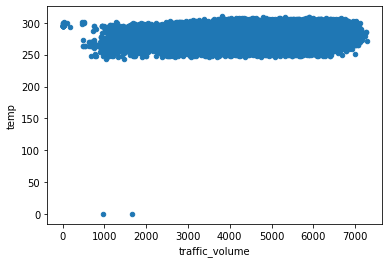

In [29]:
day.plot.scatter('traffic_volume', 'temp')
plt.show()

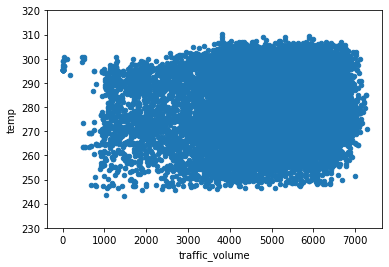

In [30]:
day.plot.scatter('traffic_volume', 'temp')
plt.ylim(230, 320) # adicionando os limites para remover as temperaturas outliers
plt.show()

Podemos concluir que a temperatura não parece um indicador sólido de tráfego intenso.

### Tipos de clima

Para começar, vamos agrupar os dados pela coluna `weather_main` e verificar as médias de `traffic_volume`.

In [31]:
by_weather_main = day.groupby('weather_main').mean()
by_weather_main

,temp,rain_1h,snow_1h,clouds_all,traffic_volume,month,year,dayofweek,hour
weather_main,,,,,,,,,
Clear,283.812078,0.000000,0.000000,1.670265,4778.416260,6.490599,2015.619429,3.138928,12.404248
Clouds,282.929274,0.000000,0.000000,62.667548,4865.415996,6.393243,2015.321420,3.005631,12.911974
Drizzle,284.456433,0.170804,0.000000,84.704417,4837.212911,7.105323,2015.882220,2.934315,12.308041
Fog,277.579641,0.163840,0.001409,65.477901,4372.491713,6.646409,2015.814917,2.798343,10.325967
Haze,275.319353,0.040036,0.000000,64.000000,4609.893285,5.832134,2015.557554,2.754197,12.467626
Mist,279.420825,0.249992,0.000825,74.961435,4623.976475,6.734285,2015.527574,2.895102,11.078288
Rain,287.089601,3.972943,0.000292,75.870116,4815.568462,6.774023,2015.572334,2.914467,12.642379
Smoke,292.405833,0.878333,0.000000,53.333333,4564.583333,6.833333,2015.916667,2.416667,13.166667
Snow,267.984505,0.014017,0.001768,80.501376,4396.321183,6.374828,2015.486245,2.750344,12.153370


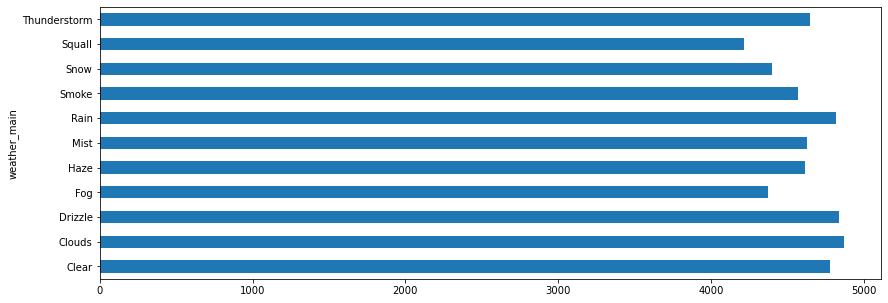

In [32]:
by_weather_main['traffic_volume'].plot.barh(figsize=(14, 5))
plt.show()

Parece que não tem nenhum tipo de clima que o volume de tráfego seja maior que 5.000 carros. Isso torna mais difícil encontrar um indicador de tráfego intenso. Vamos também agrupar por `weather_description`, que tem uma classificação de clima mais granular.

In [33]:
by_weather_description = day.groupby('weather_description').mean()
by_weather_description

,temp,rain_1h,snow_1h,clouds_all,traffic_volume,month,year,dayofweek,hour
weather_description,,,,,,,,,
SQUALLS,296.730000,1.020000,0.000000,75.000000,4211.000000,7.000000,2016.000000,2.000000,14.000000
Sky is Clear,293.232549,0.000000,0.000000,0.000000,4919.009390,7.557512,2014.723005,2.895540,12.453052
broken clouds,282.372927,0.000000,0.000000,72.635875,4824.130326,6.675260,2015.266380,2.998210,12.811314
drizzle,283.573777,0.145072,0.000000,88.589928,4737.330935,7.244604,2015.762590,3.028777,11.697842
few clouds,284.272965,0.000000,0.000000,19.391951,4839.818023,6.159230,2015.139983,2.977253,12.633421
fog,277.579641,0.163840,0.001409,65.477901,4372.491713,6.646409,2015.814917,2.798343,10.325967
freezing rain,272.860000,0.000000,0.000000,90.000000,4314.000000,6.500000,2014.500000,0.500000,13.500000
haze,275.319353,0.040036,0.000000,64.000000,4609.893285,5.832134,2015.557554,2.754197,12.467626
heavy intensity drizzle,285.467931,0.276207,0.000000,89.172414,4738.586207,7.551724,2015.793103,2.896552,12.275862


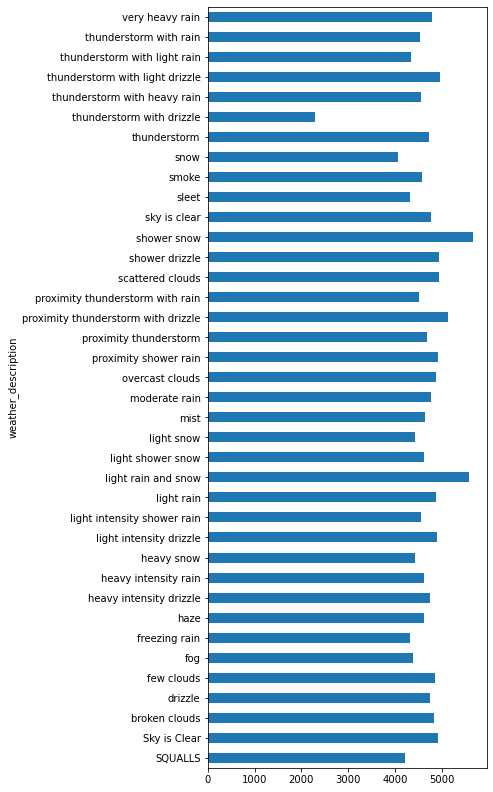

In [34]:
by_weather_description['traffic_volume'].plot.barh(figsize=(5, 14))
plt.show()

Temos 3 tipos de clima onde o volume de tráfego ultrapassa 5.000:
* Neve
* Chuva fraca e neve
* Trovoada com garoa

Não está claro por que esses tipos de clima têm os valores médio de tráfego mais altos - por mais que seja um tempo ruim, não é tão ruim assim. Talvez mais pessoas utilizem seus carros quando o tempo está ruim, ao invés de andar de bicicleta ou caminhar.

---

## Conclusão

O objetivo desse projeto foi encontrar indicadores responsáveis pelo tráfego intenso na rodovia interestadual I-94:
* Indicadores de tempo
    * Alto volume durante os meses quentes (março a outubro) em comparação com os meses frios (novembro a fevereiro)
    * Maior volume em dias úteis em comparação com finais de semana
    * Nos dias úteis, o horário de pico é em torno de 7 e 16
* Indicadores de clima
    * Neve
    * Chuva fraca e neve
    * Trovoada com garoa

![](bot-reps-dataquest.jpg)